Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Load dataset (Boston Housing dataset)

In [2]:
boston = fetch_california_housing()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

Split dataset into training and testing sets

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standardize the data

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Apply Lasso Regression for feature selection

In [5]:
lasso = Lasso(alpha=0.1) # The regularization strength is controlled by alpha
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

Get the coefficients of the features

In [6]:
lasso_coefficients = pd.Series(lasso.coef_, index=X.columns)

Print non-zero coefficients (selected features)

In [7]:
selected_features = lasso_coefficients[lasso_coefficients != 0]
print(f"Selected Features by Lasso: \n{selected_features}")

Selected Features by Lasso: 
MedInc      0.710598
HouseAge    0.106453
Latitude   -0.011469
dtype: float64


Evaluate the model performance on the test set

In [8]:
lasso_test_score = lasso.score(X_test_scaled, y_test)
print(f"Model performance with selected features (R^2 score): {lasso_test_score}")

Model performance with selected features (R^2 score): 0.48136113250290735


Feature Importances by Random Forest:
             Feature  Importance
2  petal length (cm)    0.439994
3   petal width (cm)    0.421522
0  sepal length (cm)    0.108098
1   sepal width (cm)    0.030387


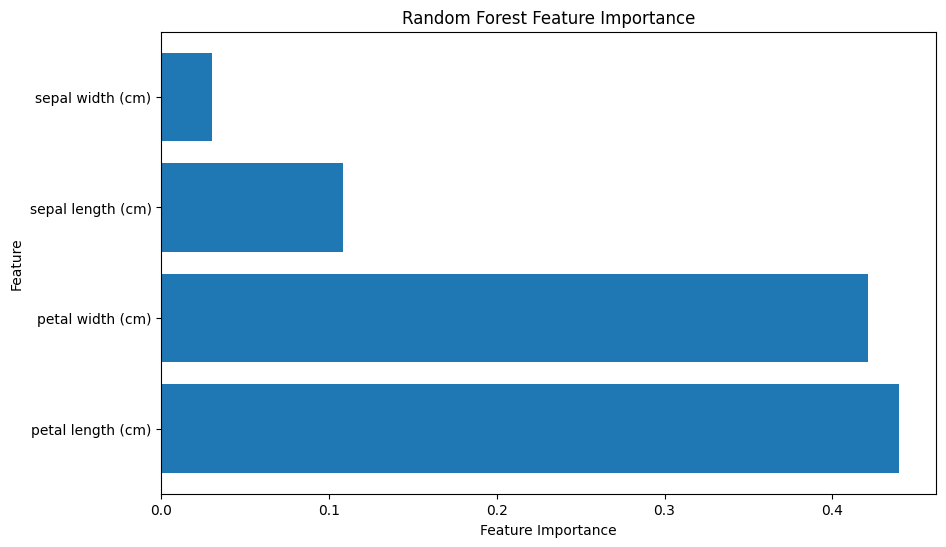

In [9]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# Load dataset (Iris dataset)
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Apply Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
# Get feature importances from the model
importances = rf.feature_importances_
feature_names = X.columns
# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# Print selected features
print("Feature Importances by Random Forest:")
print(feature_importance_df)
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()